## Results

Increasing $N_\mathrm{select}$ (number of selected trees) consistently shifts the Pareto front upward and to the right:

- More trees selected results in higher total shade ($Z_\mathrm{shade}$) and better coolwalk index ($Z_\mathrm{coolwalk}$), expanding the achievable trade-off region.

$\alpha$ strongly influences the trade-off curve shape:

- For low $\alpha$ (1.01), solutions are more shade-oriented; $Z_\mathrm{coolwalk}$ values are relatively low and less sensitive to increases in $Z_\mathrm{shade}$.

- For high $\alpha$ (100.0), solutions prioritize the coolwalk benefit, yielding higher $Z_\mathrm{coolwalk}$ values even at the cost of less $Z_\mathrm{shade}$ improvement.

- $\alpha = 2.0$ shows an intermediate trade-off between the two objectives.

Diminishing returns effect:

- For a given $\alpha$, beyond a certain $Z_\mathrm{shade}$ value, further increases in shade produce limited improvement in $Z_\mathrm{coolwalk}$.

Front shape and diversity:

- Pareto fronts are non-convex, indicating a clear trade-off and the effectiveness of NSGA-II in finding diverse solutions.

- The gap between $N_\mathrm{select}=500$ and $N_\mathrm{select}=1000$ curves is substantial, underlining the importance of resource budget in spatial optimization.

Actionable insight:

- Decision-makers can choose a preferred solution on each front according to the desired balance between maximizing shade and enhancing the coolwalk experience, guided by both $\alpha$ and $N_\mathrm{select}$.

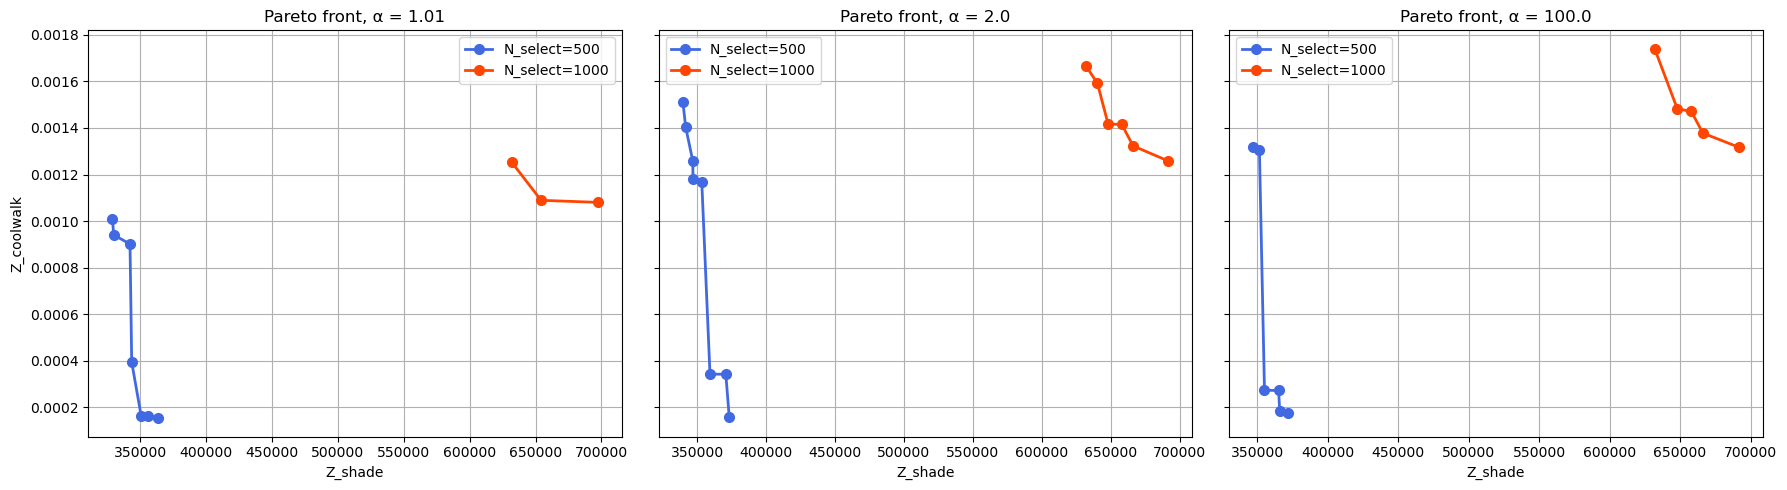

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pickle
import matplotlib.pyplot as plt


with open("data/optimization/ccd_pareto_solutions_200_1000.pkl", "rb") as f:
    data = pickle.load(f)

pareto_solutions = data['pareto_solutions']


z_shade_list = [s['Z_shade'] for s in pareto_solutions]
z_coolwalk_list = [s['Z_coolwalk'] for s in pareto_solutions]

# ---- Parameters ----
ALPHA_list = [1.01, 2.0, 100.0]
N_select_list = [500, 1000]
color_list = ['royalblue', 'orangered', 'forestgreen', 'purple', 'brown']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)  # 3 charts in a row, share y-axis

for j, ALPHA in enumerate(ALPHA_list):
    ax = axes[j]
    for i, N_SELECT in enumerate(N_select_list):
        file = f"data/optimization/ccd_pareto_solutions_{ALPHA*100:.0f}_{N_SELECT}.pkl"
        with open(file, "rb") as f:
            data = pickle.load(f)
        z_shade_list = np.array([s['Z_shade'] for s in data['pareto_solutions']])
        z_coolwalk_list = np.array([s['Z_coolwalk'] for s in data['pareto_solutions']])

        # Sort and get unique shade values with max coolwalk
        sorted_idx = np.argsort(z_shade_list)
        z_shade_sorted = z_shade_list[sorted_idx]
        z_coolwalk_sorted = z_coolwalk_list[sorted_idx]
        unique_shade = []
        max_coolwalk = []
        seen = set()
        for x, y in zip(z_shade_sorted, z_coolwalk_sorted):
            if x not in seen:
                mask = z_shade_sorted == x
                unique_shade.append(x)
                max_coolwalk.append(z_coolwalk_sorted[mask].max())
                seen.add(x)
        unique_shade = np.array(unique_shade)
        max_coolwalk = np.array(max_coolwalk)

        ax.plot(unique_shade, max_coolwalk,
                marker='o', linewidth=2, markersize=7,
                label=f'N_select={N_SELECT}',
                color=color_list[i % len(color_list)])

    ax.set_xlabel("Z_shade")
    if j == 0:
        ax.set_ylabel("Z_coolwalk")
    ax.set_title(f"Pareto front, α = {ALPHA}")
    ax.legend()
    ax.grid(True)

fig.tight_layout()
plt.show()


- As $\alpha$ increases (greater sun sensitivity), solutions provide greater improvements in coolwalk, at the expense of a lower $Z_\mathrm{shade}$.
- For low $\alpha$, solutions achieve higher $Z_\mathrm{shade}$, but only modest $Z_\mathrm{coolwalk}$ improvement.
- Each line demonstrates a trade-off between $Z_\mathrm{shade}$ and $Z_\mathrm{coolwalk}$, with no solution achieving maximum values in both.

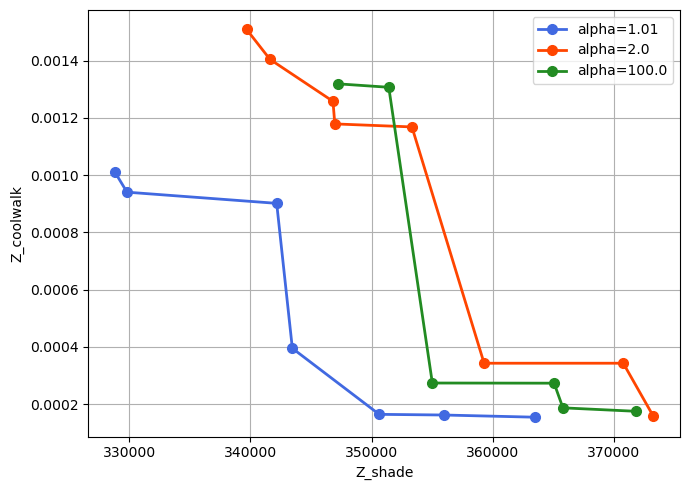

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

plt.figure(figsize=(7, 5))
color_list = ['royalblue', 'orangered', 'forestgreen', 'purple', 'brown']
for i, ALPHA in enumerate([1.01, 2.0, 100.0]):
    file = f"data/optimization/ccd_pareto_solutions_{ALPHA*100:.0f}_500.pkl"
    with open(file, "rb") as f:
        data = pickle.load(f)
    z_shade_list = np.array([s['Z_shade'] for s in data['pareto_solutions']])
    z_coolwalk_list = np.array([s['Z_coolwalk'] for s in data['pareto_solutions']])

    # 按z_shade排序，且只保留z_shade唯一时Z_coolwalk最大
    sorted_idx = np.argsort(z_shade_list)
    z_shade_sorted = z_shade_list[sorted_idx]
    z_coolwalk_sorted = z_coolwalk_list[sorted_idx]
    unique_shade = []
    max_coolwalk = []
    seen = set()
    for x, y in zip(z_shade_sorted, z_coolwalk_sorted):
        if x not in seen:
            mask = z_shade_sorted == x
            unique_shade.append(x)
            max_coolwalk.append(z_coolwalk_sorted[mask].max())
            seen.add(x)
    unique_shade = np.array(unique_shade)
    max_coolwalk = np.array(max_coolwalk)

    # 画点和分段线
    plt.plot(unique_shade, max_coolwalk,
             marker='o', linewidth=2, markersize=7,
             label=f'alpha={ALPHA}',
             color=color_list[i % len(color_list)])

plt.xlabel("Z_shade")
plt.ylabel("Z_coolwalk")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


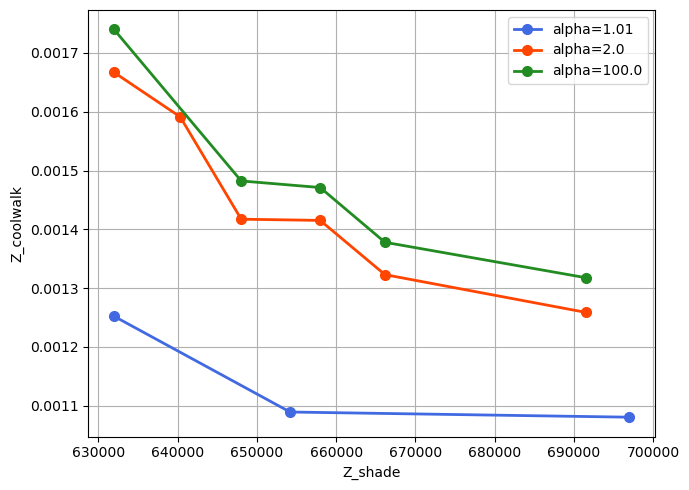

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

plt.figure(figsize=(7, 5))
color_list = ['royalblue', 'orangered', 'forestgreen', 'purple', 'brown']
for i, ALPHA in enumerate([1.01, 2.0, 100.0]):
    file = f"data/optimization/ccd_pareto_solutions_{ALPHA*100:.0f}_1000.pkl"
    with open(file, "rb") as f:
        data = pickle.load(f)
    z_shade_list = np.array([s['Z_shade'] for s in data['pareto_solutions']])
    z_coolwalk_list = np.array([s['Z_coolwalk'] for s in data['pareto_solutions']])

    # 按z_shade排序，且只保留z_shade唯一时Z_coolwalk最大
    sorted_idx = np.argsort(z_shade_list)
    z_shade_sorted = z_shade_list[sorted_idx]
    z_coolwalk_sorted = z_coolwalk_list[sorted_idx]
    unique_shade = []
    max_coolwalk = []
    seen = set()
    for x, y in zip(z_shade_sorted, z_coolwalk_sorted):
        if x not in seen:
            mask = z_shade_sorted == x
            unique_shade.append(x)
            max_coolwalk.append(z_coolwalk_sorted[mask].max())
            seen.add(x)
    unique_shade = np.array(unique_shade)
    max_coolwalk = np.array(max_coolwalk)

    # 画点和分段线
    plt.plot(unique_shade, max_coolwalk,
             marker='o', linewidth=2, markersize=7,
             label=f'alpha={ALPHA}',
             color=color_list[i % len(color_list)])

plt.xlabel("Z_shade")
plt.ylabel("Z_coolwalk")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


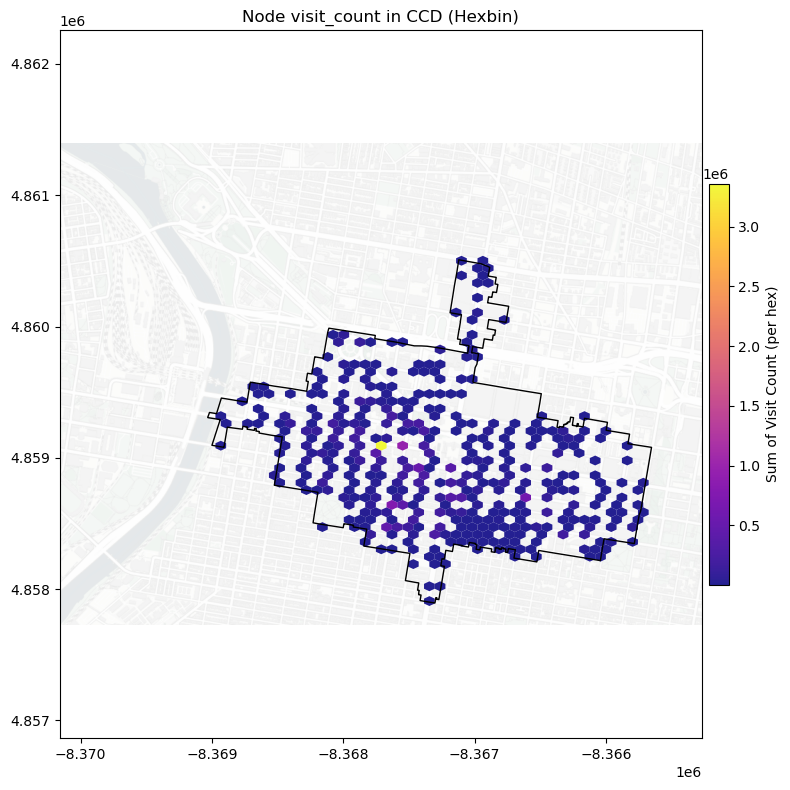

In [33]:
import pickle
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np

# 1. 加载数据
ccd_gdf = gpd.read_file('data/final/CCD_BOUNDARY.geojson').to_crs(epsg=3857)
with open('data/foot_traffic/G.pkl', 'rb') as f:
    G = pickle.load(f)

# 2. 构造 GeoDataFrame，保留 visit_count > 0
records = []
for n in G.nodes:
    x, y = G.nodes[n]['x'], G.nodes[n]['y']
    visit_count = G.nodes[n].get('visit_count', 0)
    records.append({'node_id': n, 'visit_count': visit_count, 'geometry': Point(x, y)})

node_gdf = gpd.GeoDataFrame(records, crs=6565)
node_gdf = node_gdf.to_crs(ccd_gdf.crs).loc[node_gdf['visit_count'] > 0]

# 3. 只保留在CCD范围内的节点
ccd_nodes_gdf = gpd.sjoin(node_gdf, ccd_gdf, how='inner', predicate='within')

# 4. 可视化：用 hexbin，hex 可大一点（如 gridsize=30）
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ccd_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

hb = ax.hexbin(
    ccd_nodes_gdf.geometry.x, ccd_nodes_gdf.geometry.y,
    C=ccd_nodes_gdf['visit_count'],
    reduce_C_function=np.sum,  # 统计每格总访问量
    gridsize=40,               # hex 越小越大
    cmap='plasma',
    mincnt=1,
    linewidths=0,
    alpha=0.9
)

cb = fig.colorbar(hb, ax=ax, orientation="vertical", fraction=0.03, pad=0.01)
cb.set_label("Sum of Visit Count (per hex)")

import contextily as ctx
ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels, alpha=0.6, attribution=False)

plt.title("Node visit_count in CCD (Hexbin)")
plt.axis('equal')
plt.tight_layout()
plt.show()


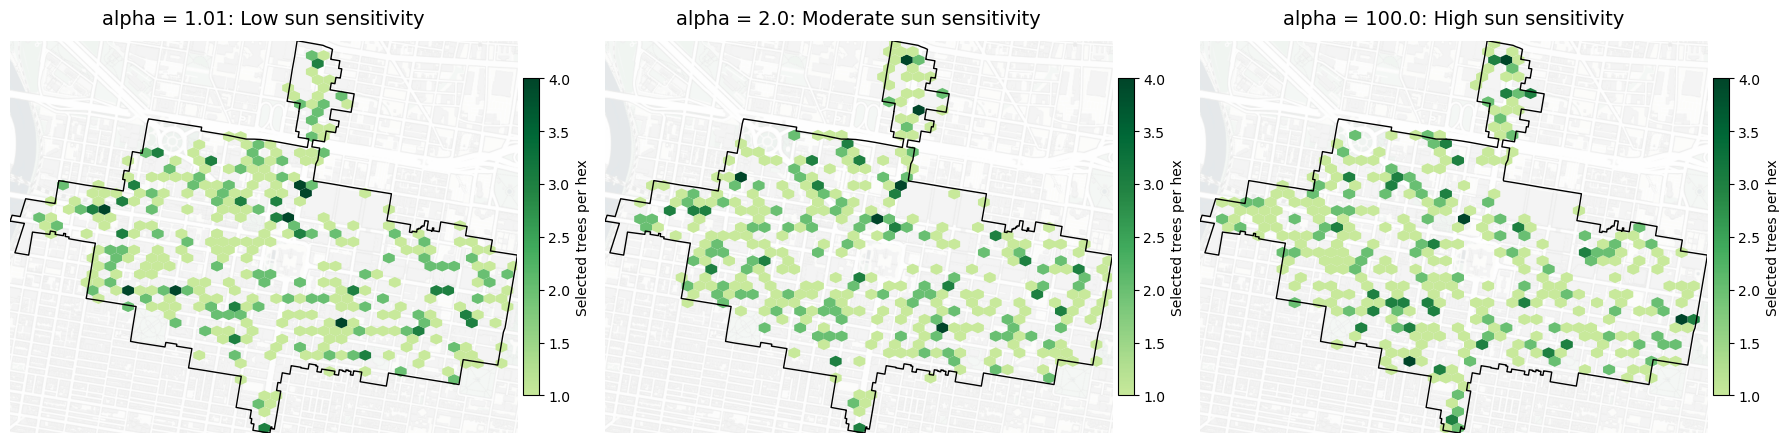

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pickle
import numpy as np

import matplotlib as mpl

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=256):
    return mpl.colors.LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{minval:.2f},{maxval:.2f})',
        cmap(np.linspace(minval, maxval, n))
    )
orig_cmap = plt.get_cmap("YlGn")
new_cmap = truncate_colormap(orig_cmap, 0.3, 1.0)


# --- PARAMETERS ---
N_SELECT = 500   # or 1000, or whatever you used
alpha_values = [1.01, 2.0, 100.0]
titles = {
    1.01:   "alpha = 1.01: Low sun sensitivity",
    2.0:    "alpha = 2.0: Moderate sun sensitivity",
    100.0:  "alpha = 100.0: High sun sensitivity"
}

# --- Load city boundary (Web Mercator) ---
ccd_gdf = gpd.read_file('data/final/CCD_BOUNDARY.geojson').to_crs(epsg=3857)
xmin, ymin, xmax, ymax = ccd_gdf.total_bounds

# --- Load all candidate trees (to locate geometry) ---
tree_gdf = gpd.read_file('data/final/tree_sites_all.geojson').to_crs(epsg=3857)

fig, axes = plt.subplots(1, len(alpha_values), figsize=(18, 6))

for ax, ALPHA in zip(axes, alpha_values):
    fname = f"data/optimization/ccd_pareto_solutions_{ALPHA*100:.0f}_{N_SELECT}.pkl"
    with open(fname, "rb") as f:
        data = pickle.load(f)
    sel_tree_ids = data['pareto_solutions'][1]['tree_ids']  # first solution
    sel_tree_gdf = tree_gdf[tree_gdf['original_index'].isin(sel_tree_ids)].copy()

    # Hexbin plot
    hb = ax.hexbin(
        sel_tree_gdf.geometry.x, sel_tree_gdf.geometry.y,
        gridsize=40,
        cmap=new_cmap,
        mincnt=1,
        linewidths=0,
        alpha=1
    )

    cb = fig.colorbar(hb, ax=ax, orientation="vertical", fraction=0.03, pad=0.01)
    cb.set_label("Selected trees per hex")

    ccd_gdf.boundary.plot(ax=ax, edgecolor="black", linewidth=1)
    ctx.add_basemap(ax,
        source=ctx.providers.CartoDB.PositronNoLabels,
        alpha=0.6,
        attribution=False
    )

    ax.set_title(titles[ALPHA], fontsize=14, pad=12)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.axis("off")

plt.tight_layout()
plt.show()


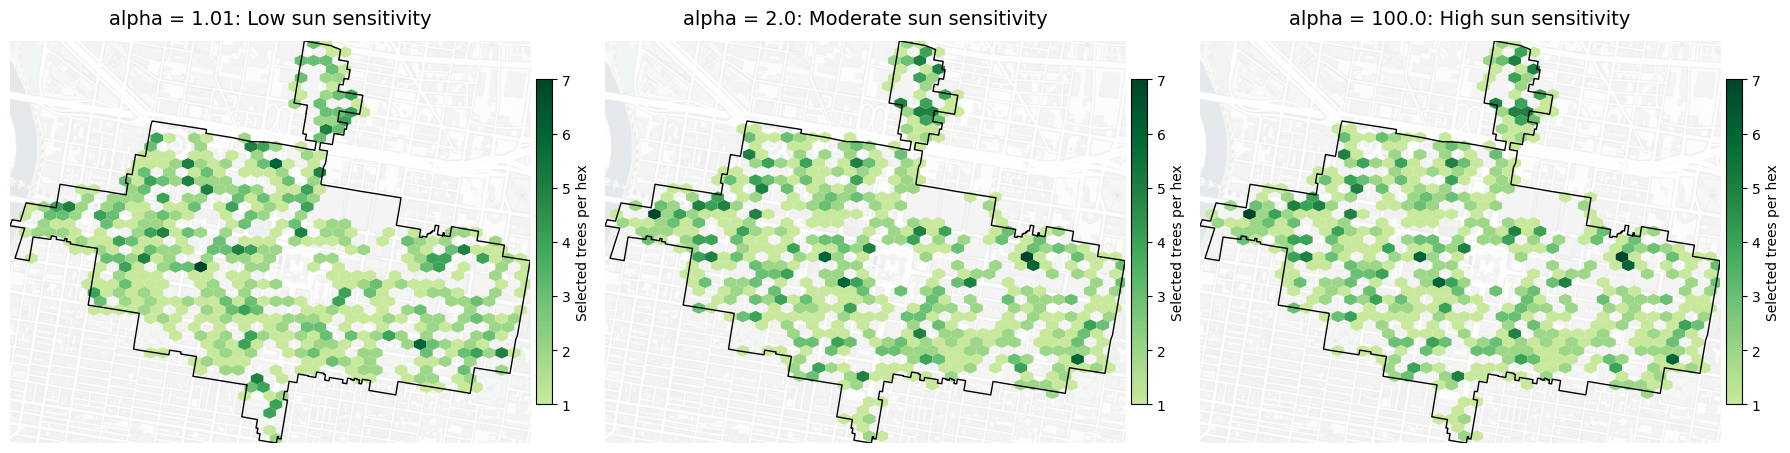

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pickle

# --- PARAMETERS ---
N_SELECT = 1000   # or 1000, or whatever you used
alpha_values = [1.01, 2.0, 100.0]
titles = {
    1.01:   "alpha = 1.01: Low sun sensitivity",
    2.0:    "alpha = 2.0: Moderate sun sensitivity",
    100.0:  "alpha = 100.0: High sun sensitivity"
}

# --- Load city boundary (Web Mercator) ---
ccd_gdf = gpd.read_file('data/final/CCD_BOUNDARY.geojson').to_crs(epsg=3857)
xmin, ymin, xmax, ymax = ccd_gdf.total_bounds

# --- Load all candidate trees (to locate geometry) ---
tree_gdf = gpd.read_file('data/final/tree_sites_all.geojson').to_crs(epsg=3857)

fig, axes = plt.subplots(1, len(alpha_values), figsize=(18, 6))

for ax, ALPHA in zip(axes, alpha_values):
    fname = f"data/optimization/ccd_pareto_solutions_{ALPHA*100:.0f}_{N_SELECT}.pkl"
    with open(fname, "rb") as f:
        data = pickle.load(f)
    sel_tree_ids = data['pareto_solutions'][1]['tree_ids']  # first solution
    sel_tree_gdf = tree_gdf[tree_gdf['original_index'].isin(sel_tree_ids)].copy()

    # Hexbin plot
    hb = ax.hexbin(
        sel_tree_gdf.geometry.x, sel_tree_gdf.geometry.y,
        gridsize=40,
        cmap=new_cmap,
        mincnt=1,
        linewidths=0,
        alpha=1
    )

    cb = fig.colorbar(hb, ax=ax, orientation="vertical", fraction=0.03, pad=0.01)
    cb.set_label("Selected trees per hex")

    ccd_gdf.boundary.plot(ax=ax, edgecolor="black", linewidth=1)
    ctx.add_basemap(ax,
        source=ctx.providers.CartoDB.PositronNoLabels,
        alpha=0.6,
        attribution=False
    )

    ax.set_title(titles[ALPHA], fontsize=14, pad=12)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.axis("off")

plt.tight_layout()
plt.show()


- Both $Z_\mathrm{shade}$ and $Z_\mathrm{coolwalk}$ are substantially improved by optimization compared to random tree selection.

- Compared to the random selection results, the optimization results significantly improved the shaded area by 1.16-7.30%, and the coolwalkability by 89.76-205.43%.

- For $N_\mathrm{select}=500$, both $Z_\mathrm{shade}$ and especially $Z_\mathrm{coolwalk}$ see greater relative improvement over random than for $N_\mathrm{select}=1000$.

- Performance gains hold for all tested values of $\alpha$ (sun sensitivity), demonstrating the broad utility of the NSGA-II approach for this spatial selection problem.

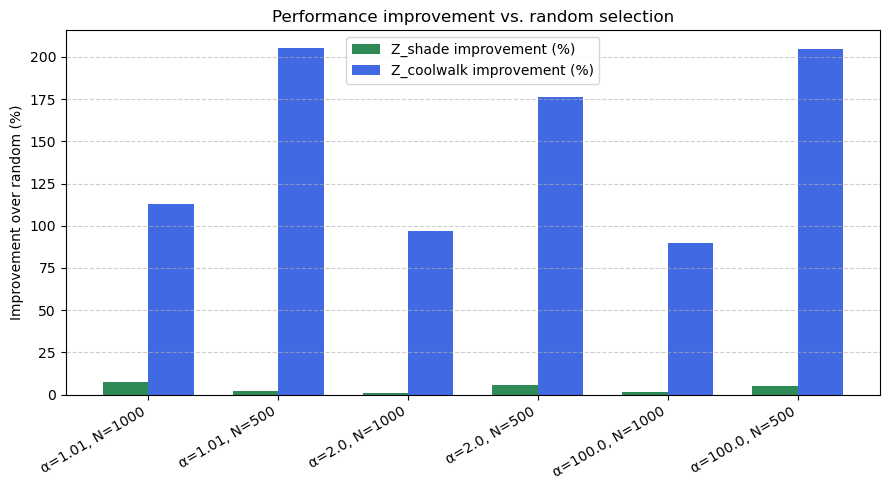

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("optimization_vs_random_compare_ideal.csv")

fig, ax = plt.subplots(figsize=(9, 5))

x_labels = [f"α={a}, N={n}" for a, n in zip(df['alpha'], df['N_select'])]
bar_width = 0.35
x = np.arange(len(x_labels))

ax.bar(x - bar_width/2, df['shade_improve_%'], bar_width, label='Z_shade improvement (%)', color='seagreen')
ax.bar(x + bar_width/2, df['coolwalk_improve_%'], bar_width, label='Z_coolwalk improvement (%)', color='royalblue')

ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=30, ha='right')
ax.set_ylabel("Improvement over random (%)")
ax.set_title("Performance improvement vs. random selection")
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


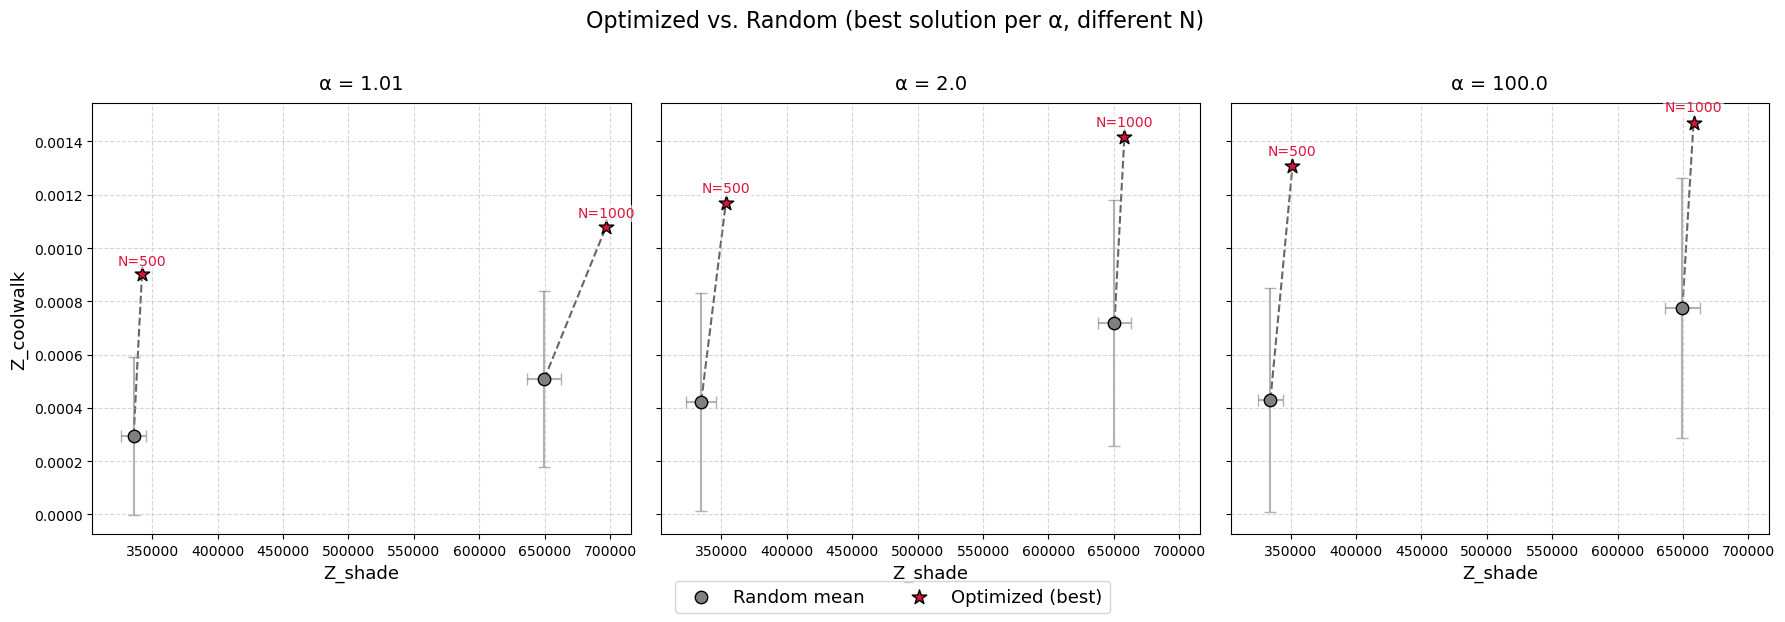

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in your summary result table
df = pd.read_csv("optimization_vs_random_compare_ideal.csv")

alpha_list = [1.01, 2.0, 100.0]
titles = {
    1.01:  "α = 1.01",
    2.0:   "α = 2.0",
    100.0: "α = 100.0"
}

fig, axes = plt.subplots(1, len(alpha_list), figsize=(18, 6), sharex=True, sharey=True)

for ax, ALPHA in zip(axes, alpha_list):
    # Filter for current alpha
    df_alpha = df[df['alpha'] == ALPHA]
    
    # Get all Y values (for offset)
    all_y = pd.concat([df_alpha['rand_Z_coolwalk_mean'], df_alpha['opt_Z_coolwalk']])
    ymin, ymax = all_y.min(), all_y.max()
    y_offset = (ymax - ymin) * 0.03 if ymax > ymin else 0.0002  # adaptive, safe default

    # Random means (gray circles)
    ax.scatter(df_alpha['rand_Z_shade_mean'], df_alpha['rand_Z_coolwalk_mean'],
               c='gray', s=80, label='Random mean', marker='o', edgecolor='k', zorder=2)
    # Error bars for random
    ax.errorbar(df_alpha['rand_Z_shade_mean'], df_alpha['rand_Z_coolwalk_mean'],
                xerr=df_alpha['rand_Z_shade_std'], yerr=df_alpha['rand_Z_coolwalk_std'],
                fmt='none', ecolor='gray', alpha=0.6, capsize=4, zorder=1)
    # Optimized solution (star)
    ax.scatter(df_alpha['opt_Z_shade'], df_alpha['opt_Z_coolwalk'],
               c='crimson', s=120, label='Optimized (best)', marker='*', edgecolor='k', zorder=3)

    # Draw dashed line between random mean and optimized for each N
    for _, row in df_alpha.iterrows():
        ax.plot([row['rand_Z_shade_mean'], row['opt_Z_shade']],
                [row['rand_Z_coolwalk_mean'], row['opt_Z_coolwalk']],
                'k--', alpha=0.6, zorder=0)
        # Annotate the optimized point with N value, just above the star
        ax.text(row['opt_Z_shade'], row['opt_Z_coolwalk'] + y_offset,
                f"N={int(row['N_select'])}",
                color='crimson', fontsize=10, ha='center', va='bottom',
                bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', pad=1))

    ax.set_title(titles[ALPHA], fontsize=14, pad=10)
    ax.grid(True, linestyle='--', alpha=0.5)

axes[0].set_ylabel("Z_coolwalk", fontsize=13)
for ax in axes:
    ax.set_xlabel("Z_shade", fontsize=13)

# Only show legend once
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=13)
plt.suptitle("Optimized vs. Random (best solution per α, different N)", fontsize=16, y=1.02)
plt.tight_layout(rect=[0,0.04,1,1])
plt.show()
